# Trump Detector - Naive Methode

### Ein CNN, welches Karikaturen bzw. Cartoons von politischen Persönlichkeiten zu einem Model zusammenfasst. Dieses Modell wird darauf trainiert Donald Trump in einer farbigen Karikatur zu finden.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Dropout,Flatten, MaxPooling2D
import tensorflow.keras.models as models
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD, Adam,RMSprop
from PIL import ImageDraw

In [2]:
filename = "trump_caricature_detector.h5"
path = "images"
test_img_path = "test_images"
result_img_path ="result_images"

#### In diesem Pfad sind die Gesichter bzw. Karikaturen verschwiedener politischer Personen. Jede Person hat einen eigenen gleichnamigen Ordner. Basierend auf dem CaVINet Dataset + ein paar weitere Bilder von Trump

In [3]:
#https://github.com/lsaiml/CaVINet

In [4]:
car_names = os.listdir(path)
print(car_names)

['Aamir_Khan', 'abraham_lincoln', 'Adam_Sandler', 'adele', 'adolf_hitler', 'Akhilesh_yadav', 'Albert_Einstein', 'alexandra_daddario', 'amitabh_bachan', 'Angela_Merkel', 'Angelina_Jolie', 'anna_hazare', 'anne_hathway', 'apj_abdul_kalam', 'arjen_Robben', 'Arnold_Schwarzenegger', 'arturo_vidal', 'arundhati_roy', 'arvind_kejriwal', 'ar_rahman', 'Barak_Obama', 'beckham', 'Beyonce', 'Bill_Clinton', 'Bill_Cosby', 'Bill_Gates', 'Bill_Murray', 'bradley_cooper', 'Brad_Pitt', 'brazilian_ronaldo', 'britney_spears', 'Bruce_Willis', 'Bruno_Mars', 'cameron_diaz', 'Carlos_Tevez', 'charlie_sheen', 'Chris_Gayle', 'Chuck_Norris', 'Conan_O_Brien', 'dalai_lama', 'Daniel_Craig', 'Danny_DeVito', 'david_Villa', 'Dean_Martin', 'deepika_padukone', 'del_piero', 'Denzel_Washington', 'dilma_rousseff', 'dimaria', 'Donald_Trump', 'Dr._Dre', 'Drake', 'dwayne_johnson', 'dwyane_wade', 'Eddie_Murphy', 'Ed_Harris', 'Elvis', 'eminem', 'Emma_Stone', 'eric_cantona', 'eva_green', 'Franck_Ribery', 'gaddafi', 'George_Bush', 'g

In [5]:
print(car_names[49])

Donald_Trump


In [6]:
#im car_names array steht Donald Trump an 49. Stelle
# gezählt von 0 ...48
DONALD = 49

#### In diesem Ordner liegen die Karikaturen, an denen der fertige Trump-Detector getestet werden soll

In [7]:
test_img_array = os.listdir(test_img_path)
print(test_img_array)

['test_1.jpg', 'test_2.jpg', 'test_3.jpg', 'test_4.jpg', 'test_5.jpg', 'test_6.jpg', 'test_7.jpg']


## Konvertiere alle Bilder zu Quadraten

#### Da sich die Gesichter durch kleine aber markante Details unterscheiden, habe ich mich für eine Auflösung von 128px entschieden. Alles darunter würde die Eigenschaften verzerren. Alles darüber verlangsamt die Verarbeitung auf der CPU zu stark.

In [8]:
for names in car_names:
    cpath = os.path.join(path, names)
    for img in os.listdir(cpath):
        
        img_path = os.path.join(cpath, img)
        
        #filter .db dateien aus dem CaVINet Data Set
        if img_path[-2:]=='db':
            continue
        
        im = Image.open(img_path)
        
        sqrWidth = np.ceil(np.sqrt(im.size[0]*im.size[1])).astype(int)
        im_resize = im.resize((sqrWidth, sqrWidth))
        
        #delete old image
        os.remove(img_path)
        
        im_resize = im_resize.resize((128, 128))
        im_resize.save(img_path)
        

## Transform Dataset to Train/Test

#### Hier werden die Bilder und ihre Identitäten so aufgeteilt, dass sie in einem Train/Test-Verfahren verwendet werden können

In [9]:
data = []
label = []
label_val = 0

for names in car_names:
    cpath = os.path.join(path, names)
    for img in os.listdir(cpath):
        image_array = cv2.imread(os.path.join(cpath, img))
        #wenn hier fehler auftaucht
        #dann wahrsch. weil Dateiname zu lang
        image_array2 = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)
        data.append(image_array2)
        label.append([label_val])  
    label_val+= 1

In [10]:
data = np.asarray(data)
label = np.asarray(label)

In [11]:
#print(label)

### Test Image split

In [12]:
#70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3)

In [13]:
X_train[0].shape

(128, 128, 3)

In [14]:
y_train[0].shape

(1,)

[185]


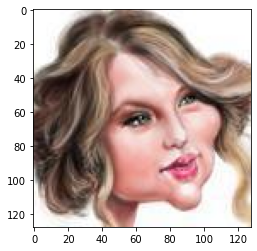

In [15]:
print(y_train[20])
plt.imshow(X_train[20])
plt.show()

In [16]:
print(car_names[int(y_train[20])])

taylor_swift


## The Model - Trump oder nicht Trump - Ja/Nein Modell

In [17]:
X_train = X_train.astype(np.float32) / 255.
X_test = X_test.astype(np.float32) / 255.

In [18]:
X_train.shape

(3466, 128, 128, 3)

In [19]:
y_train.shape

(3466, 1)

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(128, 128, 3), activation="relu", padding="same"))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=RMSprop(lr=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

#### Zusätzliche Daten generieren

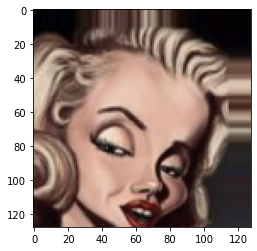

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(
    width_shift_range=10, 
    height_shift_range=10, 
    zoom_range=0.15, 
    horizontal_flip=True,
    featurewise_center=True,
    featurewise_std_normalization=True)

gen.fit(X_train)
for batch in gen.flow(X_train, y_train, shuffle=False):
    # print(batch[0].shape)
    # print(batch[1])
    
    first_image = batch[0][0]
    plt.imshow((first_image - first_image.min()) / (first_image.max() - first_image.min()))
    plt.show()
    break

#### Model trainieren

In [23]:
#Dies ist das "Lösungsarray"
#Das Model wird hier getestet, ob es alle Antworten richtig hat bzw. ob es D:Trump erkennt oder nicht

y_train_trump = y_train == DONALD
#print(y_train_trump)

In [24]:
y_test_trump = y_test == DONALD

In [25]:
gen = ImageDataGenerator(width_shift_range=10, height_shift_range=10, zoom_range=0.15, horizontal_flip=True)

# training MIT generierten Bildern
history = model.fit_generator(
    gen.flow(X_train, y_train_trump, batch_size=128, shuffle=True),
    validation_data=(X_test,y_test_trump), 
    epochs=15)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
28/28 [==============================] - 214s 8s/step - loss: 0.1685 - accuracy: 0.9694 - val_loss: 0.2596 - val_accuracy: 0.9751
Epoch 2/15
28/28 [==============================] - 206s 7s/step - loss: 0.1599 - accuracy: 0.9711 - val_loss: 0.1839 - val_accuracy: 0.9751
Epoch 3/15
28/28 [==============================] - 208s 7s/step - loss: 0.1481 - accuracy: 0.9711 - val_loss: 0.3350 - val_accuracy: 0.9751
Epoch 4/15
28/28 [==============================] - 205s 7s/step - loss: 0.1382 - accuracy: 0.9711 - val_loss: 0.2852 - val_accuracy: 0.9751
Epoch 5/15
28/28 [==============================] - 207s 7s/step - loss: 0.1267 - accuracy: 0.9711 - val_loss: 0.1792 - val_accuracy: 0.9751
Epoch 6/15
28/28 [==============================] - 201s 7s/step - loss: 0.1070 - accuracy: 0.9714 - val_loss: 0.1179 - val_accuracy: 0.9751
Epoch 7/15
28/28 [==============================] - 210s 8s/step - loss: 0.096

In [26]:
# training ohne generierte Bilder
#model.fit(X_train, y_train_trump, batch_size=128, epochs=10, shuffle=True)

#### History

In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

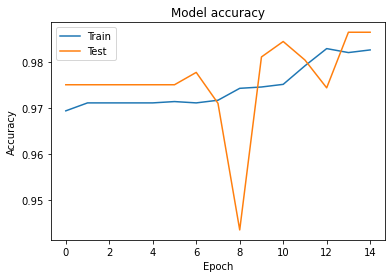

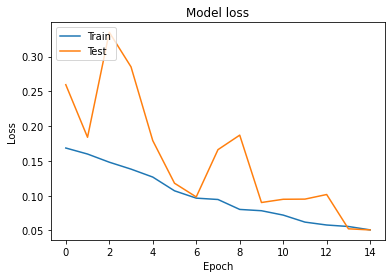

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Model evaluieren

In [29]:
print(model.evaluate(X_train, y_train_trump))

109/109 [==============================] - 46s 425ms/step - loss: 0.0464 - accuracy: 0.9876
[0.04638630151748657, 0.9875937700271606]


In [30]:
print(model.evaluate(X_test, y_test_trump))

47/47 [==============================] - 20s 426ms/step - loss: 0.0507 - accuracy: 0.9865
[0.050744131207466125, 0.9865410327911377]


In [31]:
model.save(filename)

# Model anwenden

In [32]:
model = models.load_model(filename)

#### Sliding Window Verfahren

In [33]:
size = 128
step_size = 10

In [34]:
def sliding_window(size, step_size, img, image):
    cars = [] 

    for x in range(0, img.size[0] - size, step_size):
        for y in range(0, img.size[1] - size, step_size):
            part = img.crop((x, y, x + size, y + size))
            data = np.asarray(part.resize((128, 128), resample=Image.BICUBIC))
            data = data.astype(np.float32)

            pred = model.predict(data.reshape(-1, 128, 128, 3))
            if pred[0][0] > 0.80:
                print(pred[0][0])
                cars.append((x, y))

    out = img.copy()
    draw = ImageDraw.Draw(out)

    cars_drawn = []

    for car in cars:
        exists = False
        for car_drawn in cars_drawn:
            if car[0] >= car_drawn[0] and car[0] <= car_drawn[0] + size:
                if car[1] >= car_drawn[1] and car[1] <= car_drawn[1] + size:
                    exists = True

        if exists == False:
            points = [
                car,
                (car[0], car[1] + size),
                (car[0] + size, car[1] + size),
                (car[0] + size, car[1]),
                car
            ]
            draw.line(points, "yellow", 5)
            cars_drawn.append(car)
            print(car)
            
    out = out.save(os.path.join(result_img_path, image)) 


In [35]:
for image in test_img_array:
    #test_img_path
    img = Image.open(os.path.join(test_img_path, image))
    sliding_window(size, step_size, img, image)

1.0
1.0
1.0
1.0
0.99999964
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.99916565
1.0
1.0
1.0
1.0
0.99999845
1.0
1.0
1.0
1.0
1.0
0.9999988
1.0
1.0
1.0
1.0
1.0
1.0
1.0
(30, 180)
(50, 80)
(60, 70)
(90, 30)
(100, 20)
(290, 130)
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
(330, 80)
(340, 70)
1.0
1.0
1.0
1.0
(0, 0)
1.0
1.0
1.0
1.0
(40, 50)
1.0
1.0
0.99502736
0.80762297
1.0
0.9999968
(60, 50)
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.99999404
0.994344
(0, 0)
(130, 0)


#### Ergebnis:

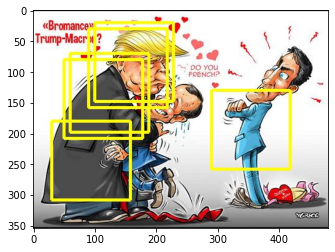

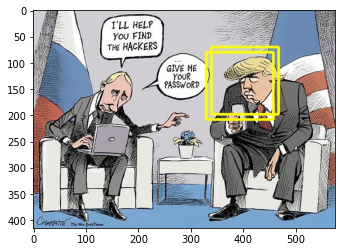

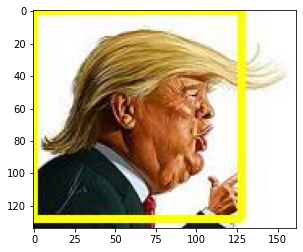

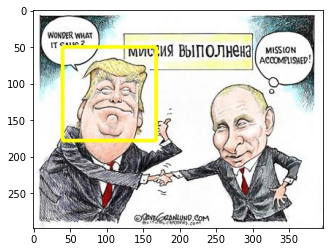

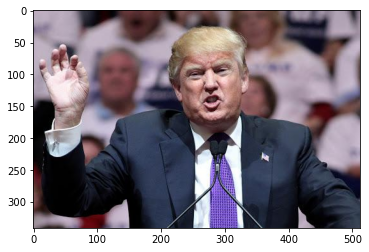

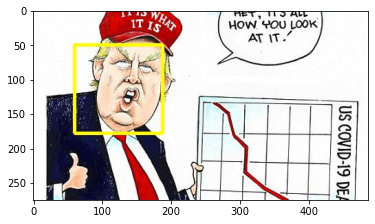

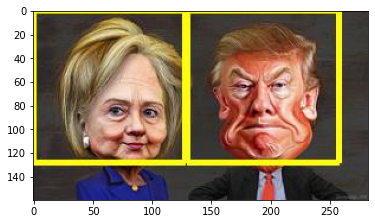

In [36]:
for img in os.listdir(result_img_path):
    image = cv2.imread(os.path.join(result_img_path, img))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    plt.imshow(image)
    plt.show()
